# Marketing Mix Modeling (MMM) Optimization

<b>About The Project</b>:<br>
The dataset is generated from "Company X's" media spending & revenue from 2016-2019.

<b>Important Question To Answer</b><br>
Can a company increase profitability by optimizing budgets?

<b>Results</b><br>
I will increase Company X's revenue by over 9% by optimizing media spending using Marketing Mix Modeling. This is acheived after readjusting the budget to increase spending in TV and Print channels while decreasing spending in OOH, Search, and Facebook channels.

In [1]:
# Import Python Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from os import mkdir, getcwd

In [2]:
# Convert dataset to Pandas
simulated_data_df = pd.read_csv("data/de_simulated_data.csv")
simulated_data_df

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S
0,2015-11-23,2.754372e+06,167687.6,0,95463.666667,7.290385e+07,0.000000,0,8125009,228213.987444
1,2015-11-30,2.584277e+06,214600.9,0,0.000000,1.658110e+07,29511.715457,31000,7901549,34258.573511
2,2015-12-07,2.547387e+06,0.0,248022,3404.000000,4.995477e+07,36132.358958,28400,8300197,127691.261335
3,2015-12-14,2.875220e+06,625877.3,0,132600.000000,3.164930e+07,36804.210958,31900,8122883,84014.720306
4,2015-12-21,2.215953e+06,0.0,520005,0.000000,8.802269e+06,28401.744069,27100,7105985,20687.478156
...,...,...,...,...,...,...,...,...,...,...
203,2019-10-14,2.456240e+06,0.0,60433,153723.666667,0.000000e+00,152840.323412,112100,7612762,0.000000
204,2019-10-21,2.182825e+06,154917.6,0,0.000000,5.688196e+07,103680.047821,103700,6701667,133624.575524
205,2019-10-28,2.377707e+06,21982.5,14094,17476.000000,0.000000e+00,138387.704138,114700,7688920,0.000000
206,2019-11-04,2.732825e+06,22453.0,0,24051.333333,0.000000e+00,151707.990462,134100,8815710,0.000000


# STEP 1 DATA UNDERSTANDING
## Data Wrangling

In [3]:
simulated_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                208 non-null    object 
 1   revenue             208 non-null    float64
 2   tv_S                208 non-null    float64
 3   ooh_S               208 non-null    int64  
 4   print_S             208 non-null    float64
 5   facebook_I          208 non-null    float64
 6   search_clicks_P     208 non-null    float64
 7   search_S            208 non-null    int64  
 8   competitor_sales_B  208 non-null    int64  
 9   facebook_S          208 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 16.4+ KB


In [4]:
# Lowercase the column names
simulated_data_df.columns = simulated_data_df.columns.str.lower()
simulated_data_df.columns

Index(['date', 'revenue', 'tv_s', 'ooh_s', 'print_s', 'facebook_i',
       'search_clicks_p', 'search_s', 'competitor_sales_b', 'facebook_s'],
      dtype='object')

In [5]:
# Change date column from object to datetime64
simulated_data_df['date'] = pd.to_datetime(simulated_data_df['date'])
simulated_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                208 non-null    datetime64[ns]
 1   revenue             208 non-null    float64       
 2   tv_s                208 non-null    float64       
 3   ooh_s               208 non-null    int64         
 4   print_s             208 non-null    float64       
 5   facebook_i          208 non-null    float64       
 6   search_clicks_p     208 non-null    float64       
 7   search_s            208 non-null    int64         
 8   competitor_sales_b  208 non-null    int64         
 9   facebook_s          208 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 16.4 KB


## Visualize Time Series Data

In [6]:
simulated_data_df \
    .melt(
        id_vars="date"
    )

,date,variable,value
0,2015-11-23,revenue,2.754372e+06
1,2015-11-30,revenue,2.584277e+06
2,2015-12-07,revenue,2.547387e+06
3,2015-12-14,revenue,2.875220e+06
4,2015-12-21,revenue,2.215953e+06
...,...,...,...
1867,2019-10-14,facebook_s,0.000000e+00
1868,2019-10-21,facebook_s,1.336246e+05
1869,2019-10-28,facebook_s,0.000000e+00
1870,2019-11-04,facebook_s,0.000000e+00


In [7]:
# Plot Data
simulated_data_df \
    .melt(
        id_vars="date"
    ) \
    .pipe(
        px.line,
        x              = "date", 
        y              = "value", 
        color          = "variable", 
        facet_col      = "variable", 
        facet_col_wrap = 2,
        template       = "plotly_dark"
    ) \
    .update_yaxes(matches=None)

![Alt text](newplot1.png)

## Visualize Current Spend Profile

In [8]:
simulated_data_df \
    .filter(regex = '_s$', axis = 1)

,tv_s,ooh_s,print_s,search_s,facebook_s
0,167687.6,0,95463.666667,0,228213.987444
1,214600.9,0,0.000000,31000,34258.573511
2,0.0,248022,3404.000000,28400,127691.261335
3,625877.3,0,132600.000000,31900,84014.720306
4,0.0,520005,0.000000,27100,20687.478156
...,...,...,...,...,...
203,0.0,60433,153723.666667,112100,0.000000
204,154917.6,0,0.000000,103700,133624.575524
205,21982.5,14094,17476.000000,114700,0.000000
206,22453.0,0,24051.333333,134100,0.000000


In [9]:
simulated_data_df \
    .filter(regex = '_s$', axis = 1)\
    .sum()

tv_s          2.315616e+07
ooh_s         1.685500e+07
print_s       5.816666e+06
search_s      9.228200e+06
facebook_s    1.338890e+07
dtype: float64

In [10]:
media_spend_df = simulated_data_df \
    .filter(regex = '_s$', axis = 1)\
    .sum() \
    .to_frame() \
    .reset_index() \
    .set_axis(['media', 'spend_current'], axis = 1)

In [11]:
media_spend_df

,media,spend_current
0,tv_s,2.315616e+07
1,ooh_s,1.685500e+07
2,print_s,5.816666e+06
3,search_s,9.228200e+06
4,facebook_s,1.338890e+07


In [12]:
# Plot Media Spend
media_spend_df \
    .pipe(
        px.bar,
        x = 'media', 
        y = 'spend_current',
        color = 'media',
        template = "plotly_dark"
    )

![Alt text](newplot2.png)

## Add/Remove Features for Modeling

In [13]:
# Add month column for seasonality corelation
# Drop columns I do not need 
df = simulated_data_df \
    .assign(date_month = lambda x: x['date'].dt.month_name()) \
    .drop(["date", "search_clicks_p", "facebook_i"], axis = 1)

In [14]:
df

,revenue,tv_s,ooh_s,print_s,search_s,competitor_sales_b,facebook_s,date_month
0,2.754372e+06,167687.6,0,95463.666667,0,8125009,228213.987444,November
1,2.584277e+06,214600.9,0,0.000000,31000,7901549,34258.573511,November
2,2.547387e+06,0.0,248022,3404.000000,28400,8300197,127691.261335,December
3,2.875220e+06,625877.3,0,132600.000000,31900,8122883,84014.720306,December
4,2.215953e+06,0.0,520005,0.000000,27100,7105985,20687.478156,December
...,...,...,...,...,...,...,...,...
203,2.456240e+06,0.0,60433,153723.666667,112100,7612762,0.000000,October
204,2.182825e+06,154917.6,0,0.000000,103700,6701667,133624.575524,October
205,2.377707e+06,21982.5,14094,17476.000000,114700,7688920,0.000000,October
206,2.732825e+06,22453.0,0,24051.333333,134100,8815710,0.000000,November


## Correlation Matrix

<AxesSubplot:>

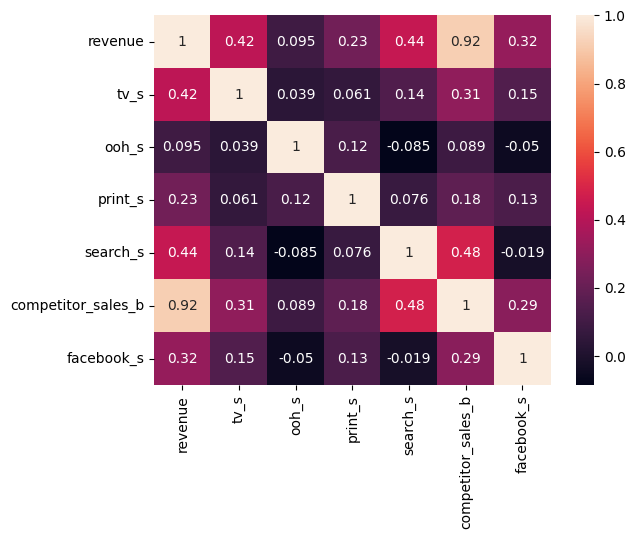

In [15]:
df \
    .corr() \
    .pipe(
        sns.heatmap,
        annot = True
    )

# STEP 2 MODELING WITH ADSTOCK

## Basic Adstock Model

In [16]:
def adstock(series, rate):

    tt = np.empty(len(series))
    tt[0] = series[0]

    for i in range(1, len(series)):
      tt[i] = series[i] + tt[i-1] * rate

    tt_series = pd.Series(tt, index=series.index)
    tt_series.name = "adstock_" + str(series.name)

    return tt_series

In [17]:
# ex. Weekly TV Spend
df.tv_s

0      167687.6
1      214600.9
2           0.0
3      625877.3
4           0.0
         ...   
203         0.0
204    154917.6
205     21982.5
206     22453.0
207         0.0
Name: tv_s, Length: 208, dtype: float64

In [18]:
# ex. Weekly TV Spend with Adstock rate 0f 0.5 from previous week
adstock(df.tv_s, 0.5)

0      167687.600000
1      298444.700000
2      149222.350000
3      700488.475000
4      350244.237500
           ...      
203    110012.441456
204    209923.820728
205    126944.410364
206     85925.205182
207     42962.602591
Name: adstock_tv_s, Length: 208, dtype: float64

In [19]:
adstock_tv_s = adstock(df.tv_s, 0.5)
adstock_ooh_s = adstock(df.ooh_s, 0.5)
adstock_print_s = adstock(df.print_s, 0.5)
adstock_search_s = adstock(df.search_s, 0.5)
adstock_facebook_s = adstock(df.facebook_s, 0.5)

## Sklearn (SciKit-Learn)
I will use a Linear Regression model

In [20]:
# 80% of data will be used as training data and 20% for testing data
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [21]:
X = pd.concat([adstock_tv_s, adstock_ooh_s, adstock_print_s, adstock_search_s, adstock_facebook_s, df.competitor_sales_b, pd.get_dummies(df.date_month)], axis=1) 

y = df.revenue

In [22]:
X

,adstock_tv_s,adstock_ooh_s,adstock_print_s,adstock_search_s,adstock_facebook_s,competitor_sales_b,April,August,December,February,January,July,June,March,May,November,October,September
0,167687.600000,0.000000,95463.666667,0.000000,228213.987444,8125009,0,0,0,0,0,0,0,0,0,1,0,0
1,298444.700000,0.000000,47731.833333,31000.000000,148365.567233,7901549,0,0,0,0,0,0,0,0,0,1,0,0
2,149222.350000,248022.000000,27269.916667,43900.000000,201874.044951,8300197,0,0,1,0,0,0,0,0,0,0,0,0
3,700488.475000,124011.000000,146234.958333,53850.000000,184951.742781,8122883,0,0,1,0,0,0,0,0,0,0,0,0
4,350244.237500,582010.500000,73117.479167,54025.000000,113163.349546,7105985,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,110012.441456,77508.672173,199039.694212,224809.284481,213899.278383,7612762,0,0,0,0,0,0,0,0,0,0,1,0
204,209923.820728,38754.336086,99519.847106,216104.642240,240574.214715,6701667,0,0,0,0,0,0,0,0,0,0,1,0
205,126944.410364,33471.168043,67235.923553,222752.321120,120287.107357,7688920,0,0,0,0,0,0,0,0,0,0,1,0
206,85925.205182,16735.584022,57669.295110,245476.160560,60143.553679,8815710,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
y

0      2.754372e+06
1      2.584277e+06
2      2.547387e+06
3      2.875220e+06
4      2.215953e+06
           ...     
203    2.456240e+06
204    2.182825e+06
205    2.377707e+06
206    2.732825e+06
207    2.767788e+06
Name: revenue, Length: 208, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
X_train

,adstock_tv_s,adstock_ooh_s,adstock_print_s,adstock_search_s,adstock_facebook_s,competitor_sales_b,April,August,December,February,January,July,June,March,May,November,October,September
166,321455.961877,26647.300648,15518.041147,226565.294515,57528.972288,7415825,0,0,0,0,1,0,0,0,0,0,0,0
196,15434.306306,94594.038088,12081.525844,115588.413558,206614.080234,6397749,0,1,0,0,0,0,0,0,0,0,0,0
8,65398.064844,142666.406250,122926.842448,52764.062500,224896.679777,6703566,0,0,0,0,1,0,0,0,0,0,0,0
40,247495.056373,328187.441152,53893.688503,27373.400667,28526.709963,6065021,0,1,0,0,0,0,0,0,0,0,0,0
109,959724.024244,118062.783472,118993.895966,160225.640982,274110.429647,6834014,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,11193.413541,31969.151796,127021.932154,57849.091075,249117.633752,4688746,0,0,0,0,0,0,0,1,0,0,0,0
192,51799.300890,103240.609410,88.413509,128814.616921,43021.524605,4982078,0,0,0,0,0,1,0,0,0,0,0,0
117,70876.137595,58033.385873,69708.181885,37507.912660,8186.963234,5389739,0,0,0,1,0,0,0,0,0,0,0,0
47,885851.477003,169399.933134,71366.268400,54923.229693,246309.111847,6734048,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
X_test

,adstock_tv_s,adstock_ooh_s,adstock_print_s,adstock_search_s,adstock_facebook_s,competitor_sales_b,April,August,December,February,January,July,June,March,May,November,October,September
12,5.321204e+05,28827.900391,54450.427653,21410.253906,122239.797354,5822926,0,0,0,1,0,0,0,0,0,0,0,0
80,7.748247e+04,147174.571430,26993.379142,30944.219860,122707.653286,2609725,0,0,0,0,0,0,1,0,0,0,0,0
33,5.716902e+04,31066.467428,19476.795092,26395.285325,10028.234582,3807127,0,0,0,0,0,1,0,0,0,0,0,0
5,4.243119e+05,291005.250000,275976.072917,55312.500000,216691.829975,7097237,0,0,1,0,0,0,0,0,0,0,0,0
187,5.352603e+04,771.501125,2829.232290,71867.741473,3820.938962,2672133,0,0,0,0,0,0,1,0,0,0,0,0
83,1.456591e+05,315831.821429,38319.839059,39943.027482,15807.514298,2963072,0,0,0,0,0,0,1,0,0,0,0,0
116,1.417523e+05,116066.771746,44745.030437,75015.825320,16373.926468,5749120,0,0,0,1,0,0,0,0,0,0,0,0
122,2.556861e+05,204457.855809,67698.609851,94672.122271,255.842601,4191403,0,0,0,0,0,0,0,1,0,0,0,0
90,2.829957e+05,209756.936105,51345.550826,35658.929902,3240.737064,4198833,0,1,0,0,0,0,0,0,0,0,0,0
154,1.737896e+05,290843.454996,22320.536122,205046.334083,133740.414248,8982377,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
X_test.shape

(52, 18)

## Modeling

In [28]:
pipeline_lm = Pipeline(
    [
        ('lm', LinearRegression())
    ]
)

In [29]:
pipeline_lm 

Pipeline(steps=[('lm', LinearRegression())])

In [30]:
pipeline_lm.fit(X_train, y_train)

Pipeline(steps=[('lm', LinearRegression())])

In [31]:
#r2_score
pipeline_lm.score(X_test, y_test)

0.8740493130709731

In [32]:
y_pred_test = pipeline_lm.predict(X_test)

In [33]:
y_pred_test

array([2027248.03051899,  857712.03218384, 1110303.47895554,
       2737099.8261692 ,  810463.72284108,  977369.54104532,
       1751492.27283769, 1378718.29724334, 1376328.36074742,
       2781882.40899214, 2430893.63092661, 2603844.48712463,
       2963314.8146917 ,  905886.88969491, 2612444.27802439,
       1337604.18110259, 2072348.60922932, 1481688.97770598,
       1578325.47936553, 1442963.49471461, 1862078.65624654,
       1624389.25439328, 2419068.26496489, 2562244.42322759,
       2606345.90777793,  991914.29915253, 1240057.13660574,
       1418248.73011086, 2480465.25419851,  930243.50496906,
       1122520.76049915, 2855077.60351283, 1179756.74985521,
       1632207.86498656,  732021.06513845, 1983094.59327892,
       1575855.59820477, 1615773.94040179, 1566660.61690937,
       1109342.42379   , 1026171.12543851, 1156011.37257602,
       3166851.34637814, 1868367.52718593, 2486001.29952889,
       1262450.3378298 ,  943591.97870377, 1861534.19500905,
       1904690.32835947,

## Score Predictions on Test Set

In [34]:
r2_score(y_test, y_pred_test)

0.8740493130709731

In [35]:
mean_absolute_error(y_test, y_pred_test)

140900.92975589266

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

235964.21037945786

## Coefficients to the Model

This will help with creating a re-balanced budget

In [37]:
pipeline_lm['lm'].coef_

array([ 6.02339686e-01,  2.93905640e-02,  8.74054767e-01,  4.97485113e-01,
        3.82174506e-01,  2.83327361e-01,  2.68806530e+05, -3.49188310e+04,
        1.29454878e+05, -2.99929355e+04, -9.40533000e+04, -1.88169388e+04,
        3.04143617e+02, -5.63292599e+04,  1.27877648e+05, -3.00496255e+04,
       -2.21558808e+05, -4.07235012e+04])

In [38]:
pipeline_lm['lm'].intercept_

-18878.63884336897

## Search Adstock Rate (Optimize for Model Fit)

Can I acheive a higher r2 score?

In [39]:
rng = np.random.default_rng(123)
size = 100
max_adstock = 1
adstock_grid_df = pd.DataFrame(dict(
    adstock_tv_s = rng.uniform(0, max_adstock, size = size), 
    adstock_ooh_s = rng.uniform(0, max_adstock, size = size),
    adstock_print_s = rng.uniform(0, max_adstock, size = size),
    adstock_search_s = rng.uniform(0, max_adstock, size = size),
    adstock_facebook_s = rng.uniform(0, max_adstock, size = size),

))
adstock_grid_df

,adstock_tv_s,adstock_ooh_s,adstock_print_s,adstock_search_s,adstock_facebook_s
0,0.682352,0.559250,0.777374,0.276273,0.363329
1,0.053821,0.428806,0.229526,0.553645,0.229046
2,0.220360,0.858597,0.421794,0.538143,0.398076
3,0.184372,0.160831,0.458137,0.431734,0.575838
4,0.175906,0.360354,0.309686,0.353279,0.766922
...,...,...,...,...,...
95,0.424371,0.212504,0.439464,0.480209,0.579940
96,0.151539,0.065639,0.293164,0.528962,0.356487
97,0.873273,0.079814,0.886759,0.781803,0.203087
98,0.179127,0.136990,0.369086,0.868045,0.982558


## Hyperparameter Tuning

In [40]:
def adstock_search(df, grid, verbose = False):

    best_model = dict(
        model = None,
        params = None,
        score = None,
    )

    for tv, ooh, prnt, search, facebook in zip(grid.adstock_tv_s, grid.adstock_ooh_s, grid.adstock_print_s, grid.adstock_search_s, grid.adstock_facebook_s):

        adstock_tv_s = adstock(df.tv_s, tv)
        adstock_ooh_s = adstock(df.ooh_s, ooh)
        adstock_print_s = adstock(df.print_s, prnt)
        adstock_search_s = adstock(df.search_s, search)
        adstock_facebook_s = adstock(df.facebook_s, facebook)

        X = pd.concat([adstock_tv_s, adstock_ooh_s, adstock_print_s, adstock_search_s, adstock_facebook_s, df.competitor_sales_b, pd.get_dummies(df.date_month)], axis=1) 

        y = df.revenue

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

        pipeline_lm = Pipeline(
            [
                ('lm', LinearRegression())
            ]
        )

        pipeline_lm.fit(X_train, y_train)

        score = pipeline_lm.score(X_test, y_test)

        if best_model['model'] is None or score > best_model['score']:
            best_model['model'] = pipeline_lm,
            best_model['params'] = dict(
                tv = tv,
                ooh = ooh,
                prnt = prnt, 
                search = search,
                facebook = facebook
            )
            best_model['score'] = score

            if verbose:
                print("New Best Model:")
                print(best_model)
                print("\n")
    
    if verbose:
        print("Done!")

    return best_model

In [41]:
best_model = adstock_search(df, adstock_grid_df, verbose= True)

New Best Model:
{'model': (Pipeline(steps=[('lm', LinearRegression())]),), 'params': {'tv': 0.6823518632481435, 'ooh': 0.5592496771336655, 'prnt': 0.7773739503357915, 'search': 0.27627345151702676, 'facebook': 0.3633292183189243}, 'score': 0.8749652956442462}


New Best Model:
{'model': (Pipeline(steps=[('lm', LinearRegression())]),), 'params': {'tv': 0.6299402045896808, 'ooh': 0.3285550874811475, 'prnt': 0.31703758931027015, 'search': 0.047376092986677554, 'facebook': 0.031040271198661817}, 'score': 0.8760469871372332}


New Best Model:
{'model': (Pipeline(steps=[('lm', LinearRegression())]),), 'params': {'tv': 0.5660890863267188, 'ooh': 0.29214916683841075, 'prnt': 0.23274570407113881, 'search': 0.07105178877187901, 'facebook': 0.22012275483278165}, 'score': 0.8762565605527994}


New Best Model:
{'model': (Pipeline(steps=[('lm', LinearRegression())]),), 'params': {'tv': 0.5191151439794955, 'ooh': 0.6526697971224407, 'prnt': 0.07923824523619538, 'search': 0.3292423950753638, 'facebook

In [42]:
best_model

{'model': (Pipeline(steps=[('lm', LinearRegression())]),),
 'params': {'tv': 0.5191151439794955,
  'ooh': 0.6526697971224407,
  'prnt': 0.07923824523619538,
  'search': 0.3292423950753638,
  'facebook': 0.09205669988298382},
 'score': 0.8778004078368988}

# STEP 3 BUDGET REBALANCE 

In [43]:
best_model_coef = best_model['model'][0]['lm'].coef_
best_model_coef_names = X.columns

In [44]:
best_model_coef

array([ 5.63611815e-01,  8.30026784e-03,  9.73240136e-01,  3.60919151e-01,
        3.17130643e-01,  2.90596456e-01,  2.62254818e+05, -4.35654122e+04,
        1.43325428e+05, -4.01322775e+04, -5.53814800e+04, -2.81215566e+04,
       -2.12567917e+04, -5.40255807e+04,  1.24381475e+05, -2.68780781e+04,
       -2.03807041e+05, -5.67935016e+04])

In [45]:
pd.DataFrame(dict(
        name = best_model_coef_names, 
        value = best_model_coef
    ))

,name,value
0,adstock_tv_s,0.563612
1,adstock_ooh_s,0.008300
2,adstock_print_s,0.973240
3,adstock_search_s,0.360919
4,adstock_facebook_s,0.317131
5,competitor_sales_b,0.290596
6,April,262254.817514
7,August,-43565.412189
8,December,143325.427525
9,February,-40132.277458


In [46]:
rebalancing_coef_df = pd.DataFrame(dict(
        name = best_model_coef_names, 
        value = best_model_coef
    )) \
    .set_index('name') \
    .filter(regex = "_s$", axis=0) \
    .assign(value = lambda x: x['value'] / np.sum(x['value'])) \
    .reset_index()

In [47]:
# These value are scaled to $1.00
rebalancing_coef_df

,name,value
0,adstock_tv_s,0.253514
1,adstock_ooh_s,0.003733
2,adstock_print_s,0.437765
3,adstock_search_s,0.162342
4,adstock_facebook_s,0.142646


## Media Spend Rebalanced

In [48]:
total_current_spend = media_spend_df['spend_current'].sum()

In [49]:
total_current_spend

68444926.46941707

In [50]:
media_spend_rebalanced_df = media_spend_df.copy()

In [51]:
media_spend_rebalanced_df['spend_new'] = total_current_spend * (rebalancing_coef_df['value'])

In [52]:
media_spend_rebalanced_df

,media,spend_current,spend_new
0,tv_s,2.315616e+07,1.735172e+07
1,ooh_s,1.685500e+07,2.555374e+05
2,print_s,5.816666e+06,2.996280e+07
3,search_s,9.228200e+06,1.111149e+07
4,facebook_s,1.338890e+07,9.763388e+06


In [53]:
media_spend_rebalanced_df \
    .melt(
        id_vars='media'
    ) \
    .pipe(
        px.bar,
        x = 'variable', 
        y = 'value',
        color = 'media', 
        barmode = 'group',
        template = 'plotly_dark'
    )

![Alt text](newplot3.png)

## Predicted Revenue after Rebalancing

In [54]:
X_train_adstock = X_train[X_train.columns[X_train.columns.str.startswith('adstock_')]]

In [55]:
X_train_adstock

,adstock_tv_s,adstock_ooh_s,adstock_print_s,adstock_search_s,adstock_facebook_s
166,321455.961877,26647.300648,15518.041147,226565.294515,57528.972288
196,15434.306306,94594.038088,12081.525844,115588.413558,206614.080234
8,65398.064844,142666.406250,122926.842448,52764.062500,224896.679777
40,247495.056373,328187.441152,53893.688503,27373.400667,28526.709963
109,959724.024244,118062.783472,118993.895966,160225.640982,274110.429647
...,...,...,...,...,...
67,11193.413541,31969.151796,127021.932154,57849.091075,249117.633752
192,51799.300890,103240.609410,88.413509,128814.616921,43021.524605
117,70876.137595,58033.385873,69708.181885,37507.912660,8186.963234
47,885851.477003,169399.933134,71366.268400,54923.229693,246309.111847


In [56]:
X_train_not_adstock = X_train[X_train.columns[~X_train.columns.str.startswith('adstock_')]]

In [57]:
X_train_not_adstock

,competitor_sales_b,April,August,December,February,January,July,June,March,May,November,October,September
166,7415825,0,0,0,0,1,0,0,0,0,0,0,0
196,6397749,0,1,0,0,0,0,0,0,0,0,0,0
8,6703566,0,0,0,0,1,0,0,0,0,0,0,0
40,6065021,0,1,0,0,0,0,0,0,0,0,0,0
109,6834014,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,4688746,0,0,0,0,0,0,0,1,0,0,0,0
192,4982078,0,0,0,0,0,1,0,0,0,0,0,0
117,5389739,0,0,0,1,0,0,0,0,0,0,0,0
47,6734048,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
X_train_adstock_rebal = X_train_adstock.copy()

In [59]:
X_train_adstock_rebal.sum(axis = 1)

166    6.477156e+05
196    4.443124e+05
8      6.086521e+05
40     6.854763e+05
109    1.631117e+06
           ...     
67     4.771512e+05
192    3.269645e+05
117    2.443126e+05
47     1.427850e+06
172    2.441256e+05
Length: 156, dtype: float64

In [60]:
for i, col in enumerate(X_train_adstock_rebal.columns):
    X_train_adstock_rebal[col] = X_train_adstock_rebal.sum(axis = 1) * rebalancing_coef_df['value'][i]

In [61]:
# New Profile
X_train_adstock_rebal

,adstock_tv_s,adstock_ooh_s,adstock_print_s,adstock_search_s,adstock_facebook_s
166,164204.667839,1831.135829,203844.467891,106167.561007,76112.541489
196,112639.200720,2021.740831,196532.412442,102826.774387,88530.922864
8,154301.537914,2604.305722,244051.137375,110168.185933,104990.495905
40,173777.523244,2283.985694,125137.462632,57972.193673,55303.510841
109,413510.189257,4050.457370,425021.975810,207297.586213,188861.831083
...,...,...,...,...,...
67,120964.295967,2191.258664,243898.262488,109421.870133,103502.909509
192,82889.919392,1336.789496,112134.070323,59773.839426,42673.396139
117,61936.547585,878.759042,78017.770832,30281.328562,25576.604497
47,361979.314621,3374.978206,323049.987834,160659.628623,156250.466208


In [62]:
X_train_rebal = pd.concat([X_train_adstock_rebal, X_train_not_adstock], axis = 1)

In [63]:
predicted_revenue_current = best_model['model'][0].predict(X_train).sum()

In [64]:
# The original budget gave $297 million in revenue
predicted_revenue_current

297025375.7461321

In [65]:
predicted_revenue_new = best_model['model'][0].predict(X_train_rebal).sum()

In [66]:
# The new budget gives $311 million in revenue
predicted_revenue_new 

311728820.7295334

In [67]:
# The new rebalance budget will increase revenue by 5%
predicted_revenue_new / predicted_revenue_current

1.0495023192764794

# STEP 4 BUDGET OPTIMIZATION

In [68]:
# Increase the size to 1,000 different budget allocations
rng = np.random.default_rng(123)
size = 1000
budget_grid_df = pd.DataFrame(dict(
    adstock_tv_s = rng.uniform(0, 1, size = size), 
    adstock_ooh_s = rng.uniform(0, 1, size = size),
    adstock_print_s = rng.uniform(0, 1, size = size),
    adstock_search_s = rng.uniform(0, 1, size = size),
    adstock_facebook_s = rng.uniform(0, 1, size = size),
))
budget_grid_df

,adstock_tv_s,adstock_ooh_s,adstock_print_s,adstock_search_s,adstock_facebook_s
0,0.682352,0.461518,0.347717,0.521592,0.695943
1,0.053821,0.189507,0.945177,0.515216,0.896684
2,0.220360,0.579512,0.958939,0.559963,0.591717
3,0.184372,0.939047,0.229472,0.201202,0.659680
4,0.175906,0.299072,0.490449,0.565022,0.038894
...,...,...,...,...,...
995,0.537338,0.398379,0.033747,0.438913,0.156921
996,0.388505,0.984440,0.292636,0.695731,0.181935
997,0.697279,0.601336,0.457860,0.897653,0.564039
998,0.667140,0.105915,0.056691,0.112683,0.279696


In [70]:
def optimize_budget(df, grid, media_spend, verbose = True):

    X_train = df
    budget_grid_df = grid
    media_spend_df = media_spend

    best_budget = dict(
        rebalancing_coef = None,
        media_spend_rebal = None,
        score = None,
    )

    for i, row in enumerate(budget_grid_df.index):
        
        # Scale the random budget mix
        budget_scaled = budget_grid_df.loc[i, :] / np.sum(budget_grid_df.loc[i, :])

        # print(budget_scaled)

        # Create rebalencing coefficients
        rebalancing_coef_df = budget_scaled \
            .to_frame() \
            .reset_index() \
            .set_axis(['name', 'value'], axis = 1)

        # Rebalance Adstock
        X_train_adstock = X_train[X_train.columns[X_train.columns.str.startswith('adstock_')]]

        X_train_not_adstock = X_train[X_train.columns[~X_train.columns.str.startswith('adstock_')]]

        X_train_adstock_rebal = X_train_adstock.copy()
        X_train_adstock_rebal.sum(axis = 1)

        for i, col in enumerate(X_train_adstock_rebal.columns):
            X_train_adstock_rebal[col] = X_train_adstock_rebal.sum(axis = 1) * rebalancing_coef_df['value'][i]

        X_train_rebal = pd.concat([X_train_adstock_rebal, X_train_not_adstock], axis = 1)

        # Make Predictions
        predicted_revenue_current = best_model['model'][0].predict(X_train).sum()

        predicted_revenue_new = best_model['model'][0].predict(X_train_rebal).sum()
        
        score = predicted_revenue_new / predicted_revenue_current

        # Media Spend Rebalanced
        total_current_spend = media_spend_df['spend_current'].sum()
        media_spend_rebalanced_df = media_spend_df.copy()
        media_spend_rebalanced_df['spend_new'] = total_current_spend * (rebalancing_coef_df['value'])

        if best_budget['score'] is None or score > best_budget['score']:
            best_budget['rebalancing_coef'] = rebalancing_coef_df,
            best_budget['media_spend_rebal'] = media_spend_rebalanced_df
            best_budget['score'] = score

            if verbose:
                print("New Best Budget:")
                print(best_budget)
                print("\n")
    
    if verbose:
        print("Done!")

    return best_budget

In [71]:
budget_optimized = optimize_budget(
    df          = X_train,
    grid        = budget_grid_df, 
    media_spend =  media_spend_df,
    verbose     = True
)

New Best Budget:
{'rebalancing_coef': (                 name     value
0        adstock_tv_s  0.251872
1       adstock_ooh_s  0.170357
2     adstock_print_s  0.128351
3    adstock_search_s  0.192532
4  adstock_facebook_s  0.256889,), 'media_spend_rebal':         media  spend_current     spend_new
0        tv_s   2.315616e+07  1.723936e+07
1       ooh_s   1.685500e+07  1.166008e+07
2     print_s   5.816666e+06  8.784948e+06
3    search_s   9.228200e+06  1.317781e+07
4  facebook_s   1.338890e+07  1.758272e+07, 'score': 0.9974214846728982}


New Best Budget:
{'rebalancing_coef': (                 name     value
0        adstock_tv_s  0.112089
1       adstock_ooh_s  0.190572
2     adstock_print_s  0.312519
3    adstock_search_s  0.360037
4  adstock_facebook_s  0.024784,), 'media_spend_rebal':         media  spend_current     spend_new
0        tv_s   2.315616e+07  7.671911e+06
1       ooh_s   1.685500e+07  1.304366e+07
2     print_s   5.816666e+06  2.139032e+07
3    search_s   9.228200e+06

In [72]:
# I am now over a 9% increase in revenue with new budget optimization
budget_optimized

{'rebalancing_coef': (                 name     value
  0        adstock_tv_s  0.460177
  1       adstock_ooh_s  0.012850
  2     adstock_print_s  0.383491
  3    adstock_search_s  0.093259
  4  adstock_facebook_s  0.050223,),
 'media_spend_rebal':         media  spend_current     spend_new
 0        tv_s   2.315616e+07  3.149681e+07
 1       ooh_s   1.685500e+07  8.794959e+05
 2     print_s   5.816666e+06  2.624801e+07
 3    search_s   9.228200e+06  6.383084e+06
 4  facebook_s   1.338890e+07  3.437520e+06,
 'score': 1.092722501287545}

In [73]:
# Visualize New Spend
budget_optimized['media_spend_rebal'] \
    .melt(
        id_vars='media'
    ) \
    .pipe(
        px.bar,
        x = 'variable', 
        y = 'value',
        color = 'media', 
        barmode = 'group',
        template = 'plotly_dark'
    ) 

![Alt text](newplot4.png)

In [74]:
# Save Outputs
from joblib import dump, load

dump(best_model, "artifacts/best_model")
load("artifacts/best_model")

dump(media_spend_df, "artifacts/media_spend_df")
load("artifacts/media_spend_df")

dump(X_train, "artifacts/X_train")
load("artifacts/X_train")

,adstock_tv_s,adstock_ooh_s,adstock_print_s,adstock_search_s,adstock_facebook_s,competitor_sales_b,April,August,December,February,January,July,June,March,May,November,October,September
166,321455.961877,26647.300648,15518.041147,226565.294515,57528.972288,7415825,0,0,0,0,1,0,0,0,0,0,0,0
196,15434.306306,94594.038088,12081.525844,115588.413558,206614.080234,6397749,0,1,0,0,0,0,0,0,0,0,0,0
8,65398.064844,142666.406250,122926.842448,52764.062500,224896.679777,6703566,0,0,0,0,1,0,0,0,0,0,0,0
40,247495.056373,328187.441152,53893.688503,27373.400667,28526.709963,6065021,0,1,0,0,0,0,0,0,0,0,0,0
109,959724.024244,118062.783472,118993.895966,160225.640982,274110.429647,6834014,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,11193.413541,31969.151796,127021.932154,57849.091075,249117.633752,4688746,0,0,0,0,0,0,0,1,0,0,0,0
192,51799.300890,103240.609410,88.413509,128814.616921,43021.524605,4982078,0,0,0,0,0,1,0,0,0,0,0,0
117,70876.137595,58033.385873,69708.181885,37507.912660,8186.963234,5389739,0,0,0,1,0,0,0,0,0,0,0,0
47,885851.477003,169399.933134,71366.268400,54923.229693,246309.111847,6734048,0,0,0,0,0,0,0,0,0,0,1,0



I was able to increase Company X's revenue by over 9% by increasing spend in TV and Print channels while decreasing spend in OOH, Facebook and Search channels.

# This Is The End Of The Project, Thank You!